在这本篇中，我们将绘制表面张力等温线图。对于此篇，我们需要用到numpy、matplotlib.pyplot和matplotlib软件包。

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import rcParams
from scipy.interpolate import make_interp_spline
from scipy.optimize import curve_fit
np.set_printoptions(suppress=True)
from sympy import *
import math
config = {
    "font.family":'serif',               #设置字体家族
    "font.size": 12,                     #设置中文字体为宋体12号，英文字体为Times New Roman
    "mathtext.fontset":'stix',
    "font.serif": ['Times New Roman'],
}
rcParams.update(config)

定义一个computeCorrelation(X, Y)函数，计算线性回归中的相关性以及R$^{2}$，以此来判断线性拟合的相关程度。

In [9]:
def computeCorrelation(X, Y):             #计算相关性
    xBar = np.mean(X)                     #计算X的平均值
    yBar = np.mean(Y)                     #计算Y的平均值
    SSR = 0
    varX = 0
    varY = 0
    for i in range(0, len(X)):
        diffXXBar = X[i] - xBar
        diffYYBar = Y[i] - yBar
        SSR += (diffXXBar * diffYYBar)
        varX += diffXXBar ** 2
        varY += diffYYBar ** 2

    SST = math.sqrt(varX * varY)
    print("r：", SSR / SST, "r-squared：", (SSR / SST) ** 2)
    return

print(matplotlib.matplotlib_fname())

c:\users\华硕\appdata\local\programs\python\python38\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [10]:
h = [22.9,22.0,18.9,17.7,16.0,14.6,13.4,12.0]
h = np.array(h)
h = h/100
#切换到国际单位制
s = 0.07197/0.279       #25℃
s = s*h
print(s)
#求出表面张力s

c = [0.52,0.90,1.51,1.92,2.40,2.69,3.51,3.62]
c = np.array(c)
#单位是mol/L

[0.05907215 0.05675054 0.04875387 0.04565839 0.04127312 0.03766172
 0.03456624 0.03095484]


本实验用泡压法测定表面张力。装置中毛细管口和液面正好相切，液面沿毛细管上升。打开分液漏斗活塞时，漏斗中的水缓慢下滴，使体系中压力减小，毛细管内液面上的压力大于试管中液面压力，压差为△p。在△p作用下，毛细管中液面下降并在管口产生小气泡。小气泡的内外压差也是△p，抽气时，小气泡的内外压差△p不断增加。根据拉普拉斯公式，小气泡能承受的最大压力为：
$$△p_{max} = \frac{2\sigma}{r}$$

在连续缓慢的抽气过程中，小气泡的曲率半径在不断减小，小气泡的内外压差△p也在不断地增加，当△p和小气泡能承受的最大压力△p$_{max}$相等时，气泡离开毛细管口。此时的△p为△p$_{max}$，可由装置中的压力计上读出。

因为
$$△p_{max} = ρg△h = ρg△lsinɵ$$
式中,△l = l-l$_{0}$。l$_{0}$为压力计无压差时读数;g为重力加速度;ρ为压力计中所盛液体的密度。所以：
$$\sigma = \frac{r}{2}ρg△lsinɵ$$
若用同一毛细管和压力计在同一温度下测定两种液体，则有：
$$\frac{\sigma_{1}}{\sigma_{2}} = \frac{Δl_{1}}{Δl_{2}}$$
式中，K为仪器常数。若用已知表面张力为$\sigma_{2}$的液体作标准，从上式可求出其他液体的表面张力$\sigma_{1}$。

[ 0.13165538 -0.05016724  3.66669584]
Figure1的相关系数
r： -0.9966910771970504 r-squared： 0.9933931033642167
None


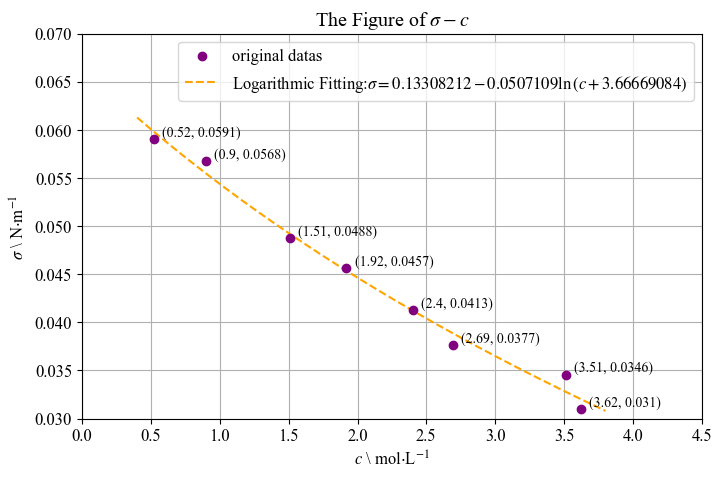

In [11]:
def runplt(size=None):
    plt.figure(figsize=(8,5))
    plt.title(r'The Figure of $\sigma-c$')
    plt.xlabel(r'$c\ $\ mol$\cdot $L$^{-1}$')
    plt.ylabel(r'$\sigma\ $\ N$\cdot $m$^{-1}$')
    plt.axis([0, 4.5,0.03, 0.07])
    # plt.axis([])
    return plt

def funlog(c, a, b, d):
    return a + b * np.log(c + d)
popt, pcov = curve_fit(funlog, c, s,maxfev=50000)
r = funlog(c, *popt)
print(popt)
# x = symbols('c')
print('Figure1的相关系数')
print(computeCorrelation(c, r))

plt=runplt()
plt.grid(zorder=0)
plt.scatter(c,s,c='purple',marker='o',label='original datas',zorder=3)
c2 = np.linspace(0.4,3.8,500)
s2 = make_interp_spline(c,r)(c2)
plt.plot(c2,s2,ls='--',c='orange',label=r'Logarithmic Fitting:$\sigma = 0.13308212-0.0507109\ln{(c+3.66669084)}$',zorder=2)
plt.legend(loc='upper right')
for X, y in zip(c, s):
    plt.text(X+0.06, y, (np.around(X,2),np.around(y,4)),ha='left', va='bottom', fontsize=10)
plt.savefig('Figure1.pdf',bbox_inches='tight')
plt.show()


对于液体表面，由于液相和气相的密度不同，处于表面层的分子和体相分子的化学环境是不同的，表面层上的分子比体相的分子具有较高的能量，把体相的分子移动到表面须对体系做功，把单位表面积上表面层的分子比相同数量的体相分子高出的吉布斯能称为表面吉布斯能，也就是表面张力。液体的表面张力促使液体收缩其表面，以使液体的表面吉布斯能降到最低。在定温定压下，可逆扩展液体的表面积dA，环境对系统做功δW'，δW'=$\sigma$dA，体系的吉布斯能增加dG，因为dT=0，dp=0，dG=δW',所以dG=$\sigma$dA，因此：
$$\sigma = (\frac{əG}{əA})_{T,p,n_{B}}$$
式中，$\sigma$为溶液的表面吉布斯能，也称为表面张力，J/m$^{2}$或 N/m。纯液体的表面张力和物质的性质、温度和压力等有关，定温定压下有确定值。溶液的表面张力和溶剂、溶质的性质有关，随着温度、溶液浓度而变化。能使溶液的表面张力显著降低的溶质称为表面活性物质，它们在表面层的浓度比体相浓度大。能使溶液的表面张力升高的物质称为非表面活性物质，它们在表面层的浓度比体相中要小。表面张力的升高或降低值与温度及溶液的浓度有关。在一定温度下，溶液浓度与表面张力之间的关系曲线称为表面张力等温线图。
由此可见，溶液为了降低体系的吉布斯能，不仅会自发地缩小表面至最小，还会尽可能地改变溶液的表面浓度来降低表面张力，最后造成溶液的表面层和体相浓度不同，这种现象称为溶液的表面吸附。溶液的表面吸附量由吉布斯公式描述，当溶液的浓度较稀时:
$$Γ = -\frac{c}{RT}(\frac{d\sigma}{dc}_{T})$$
式中，Γ为溶液的表面超量，mol/m$^{2}$;c为溶液的浓度，mol/L;(d$\sigma$/dc)$_{T}$为表面活度。(d$\sigma$/dc)$_{T}$>0，Γ<0，溶液发生负吸附;(d$\sigma$/dc)$_{T}$<0，Γ>0，溶液发生正吸附。(d$\sigma$/dc)$_{T}$可由$\sigma$-c曲线上不同浓度点的切线的斜率求得，从而可求出各浓度下的Γ，作Γ-c曲线，以反映表面吸附量与c的关系。

[0.00000256 0.00000406 0.000006   0.00000707 0.00000814 0.00000871
 0.00001007 0.00001023]
Z为
[0.00623092 0.00988691 0.01463338 0.01724116 0.01984629 0.02122956
 0.02453595 0.02492288]


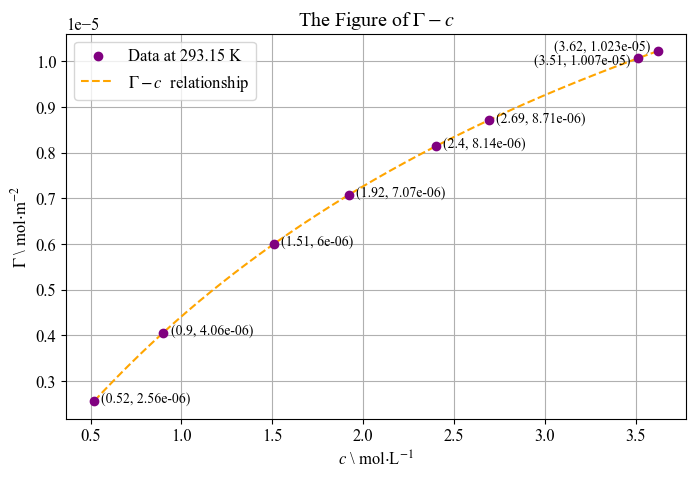

In [12]:
def runplt1(size=None):
    plt.figure(figsize=(8,5))
    plt.title(r'The Figure of $\Gamma-c$')
    plt.xlabel(r'$c\ $\ mol$\cdot $L$^{-1}$')
    plt.ylabel(r'$\Gamma\ $\ mol$\cdot $m$^{-2}$')
    # plt.axis([0, 4.0, 0, 0.000010])
    # plt.axis([])
    return plt

d = popt[1]/(c+popt[2])
gm = -c/8.314
gm = gm/(273.15+20)
gm = gm * d
print(gm)
Z = gm*8.314*(273.15+20)
print('Z为')
print(Z)

plt1=runplt1()
plt1.grid(zorder=0)
plt1.scatter(c,gm,c='purple',marker='o',label='Data at 293.15 K',zorder=3)
c3= np.linspace(0.52,3.62,500)
s3 = make_interp_spline(c,gm)(c3)
plt1.plot(c3,s3,ls='--',c='orange',label=r'$\Gamma-c\ $ relationship',zorder=2)
# plt1.ticklabel_format(style='plain')
plt1.legend(loc='upper left')
for X, y in zip(c, gm[0:6]):
    plt1.text(X+0.04, y-0.0000001, (np.around(X,2),np.around(y,8)),ha='left', va='bottom', fontsize=10)
plt1.text(c[6]-0.04, gm[6]-0.0000002, (np.around(c[6],2),np.around(gm[6],8)),ha='right', va='bottom', fontsize=10)
plt1.text(c[7]-0.04, gm[7]-0.00000005, (np.around(c[7],2),np.around(gm[7],8)),ha='right', va='bottom', fontsize=10)
plt1.savefig('Figure2.pdf',bbox_inches='tight')
plt1.show()